<a href="https://colab.research.google.com/github/Smitabhat9/e/blob/main/ml_for_DR%2CAli_logS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Final_ADME.csv')

# Display the first few rows of the DataFrame
print(df.head())
# Check for duplicates
duplicates = df.duplicated()
df_cleaned = df.drop_duplicates()
print(df_cleaned.head())

       MW  #Heavy atoms  #Aromatic heavy atoms  Fraction Csp3  \
0  473.44            34                     12           0.30   
1  473.44            34                     12           0.30   
2  473.44            34                     12           0.30   
3  445.43            32                     12           0.32   
4  445.43            32                     12           0.32   

   #Rotatable bonds  #H-bond acceptors  #H-bond donors      MR    TPSA  iLOGP  \
0                11                  8               7  126.52  219.84   0.17   
1                11                  8               7  126.52  219.84   0.17   
2                11                  8               7  126.52  219.84  -0.45   
3                10                  7               8  121.03  211.56   0.42   
4                10                  7               8  121.03  211.56   0.32   

   ...  Lipinski #violations  Ghose #violations  Veber #violations  \
0  ...                     2                  1     

In [ ]:
df = pd.read_csv('/content/Final_ADME.csv')
df


,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,473.44,34,12,0.30,11,8,7,126.52,219.84,0.17,...,2,1,2,1,2,0.11,0,1,2,4.14
1,473.44,34,12,0.30,11,8,7,126.52,219.84,0.17,...,2,1,2,1,2,0.11,0,1,2,4.14
2,473.44,34,12,0.30,11,8,7,126.52,219.84,-0.45,...,2,1,2,1,2,0.11,0,1,2,4.14
3,445.43,32,12,0.32,10,7,8,121.03,211.56,0.42,...,2,1,1,1,2,0.11,0,0,2,4.03
4,445.43,32,12,0.32,10,7,8,121.03,211.56,0.32,...,2,1,1,1,2,0.11,0,0,2,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,403.47,30,12,0.40,4,5,0,116.38,48.00,3.90,...,0,0,0,0,0,0.55,0,0,2,5.25
1917,337.46,25,5,0.68,0,3,1,98.86,46.26,3.27,...,0,0,0,0,0,0.55,0,1,1,5.50
1918,427.52,30,12,0.36,8,5,1,123.36,96.41,4.08,...,0,0,0,0,0,0.55,0,0,2,3.81
1919,516.60,37,12,0.52,10,8,1,142.60,62.13,4.89,...,2,4,0,1,0,0.17,0,2,3,4.63


Data preparation

Data separation as X and y

In [ ]:
y= y = df['Ali Log S']
y
X = df.drop('Ali Log S', axis=1)
X

,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,473.44,34,12,0.30,11,8,7,126.52,219.84,0.17,...,2,1,2,1,2,0.11,0,1,2,4.14
1,473.44,34,12,0.30,11,8,7,126.52,219.84,0.17,...,2,1,2,1,2,0.11,0,1,2,4.14
2,473.44,34,12,0.30,11,8,7,126.52,219.84,-0.45,...,2,1,2,1,2,0.11,0,1,2,4.14
3,445.43,32,12,0.32,10,7,8,121.03,211.56,0.42,...,2,1,1,1,2,0.11,0,0,2,4.03
4,445.43,32,12,0.32,10,7,8,121.03,211.56,0.32,...,2,1,1,1,2,0.11,0,0,2,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,403.47,30,12,0.40,4,5,0,116.38,48.00,3.90,...,0,0,0,0,0,0.55,0,0,2,5.25
1917,337.46,25,5,0.68,0,3,1,98.86,46.26,3.27,...,0,0,0,0,0,0.55,0,1,1,5.50
1918,427.52,30,12,0.36,8,5,1,123.36,96.41,4.08,...,0,0,0,0,0,0.55,0,0,2,3.81
1919,516.60,37,12,0.52,10,8,1,142.60,62.13,4.89,...,2,4,0,1,0,0.17,0,2,3,4.63


Data splitting

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train


,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
964,397.40,29,15,0.29,6,5,2,109.33,95.41,2.05,...,0,0,0,0,0,0.55,0,1,1,3.12
1481,444.53,33,16,0.38,7,4,0,135.37,75.51,3.95,...,0,1,0,0,0,0.55,0,0,1,3.93
737,538.54,40,27,0.16,8,7,2,145.42,97.12,3.98,...,1,3,0,1,0,0.55,0,0,3,4.07
1361,408.53,30,12,0.44,9,4,0,124.23,49.85,4.36,...,0,0,0,0,0,0.55,0,0,3,3.69
919,399.49,30,21,0.21,7,3,2,119.92,85.83,3.04,...,0,0,0,0,0,0.55,0,0,2,3.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,512.56,37,18,0.34,10,7,1,139.87,50.80,4.11,...,1,3,0,0,1,0.55,0,0,3,4.24
1895,308.26,22,6,0.20,6,6,2,73.61,73.12,2.77,...,0,0,0,0,0,0.85,0,4,1,2.80
1859,463.49,33,16,0.38,10,8,2,122.45,78.63,4.37,...,0,1,0,1,1,0.55,0,0,3,4.00
792,443.49,33,20,0.23,8,6,2,126.80,95.70,3.43,...,0,0,0,0,0,0.55,0,0,3,2.87


In [ ]:
X_test

,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,MR,TPSA,iLOGP,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
1575,385.48,27,12,0.29,12,4,1,106.43,97.77,2.60,...,0,0,1,0,0,0.55,0,1,2,3.47
730,422.25,26,12,0.28,7,5,3,98.41,91.32,2.98,...,0,0,0,0,0,0.55,0,0,1,3.54
1700,374.44,28,18,0.18,8,4,2,106.93,83.98,3.58,...,0,0,0,0,0,0.55,0,0,2,2.61
1356,349.34,25,11,0.31,6,6,4,89.54,98.91,1.91,...,0,0,0,0,0,0.55,0,0,0,3.13
287,413.35,30,17,0.10,8,9,2,103.07,119.09,2.36,...,0,0,0,0,0,0.56,0,0,3,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,421.46,31,16,0.28,8,6,3,117.82,90.65,2.79,...,0,0,0,0,0,0.56,0,0,3,4.21
290,297.14,20,5,0.50,6,5,3,74.65,124.10,0.00,...,0,0,0,0,0,0.56,0,1,0,3.62
999,379.43,28,15,0.27,6,4,1,112.16,58.10,3.29,...,0,0,0,0,0,0.55,0,0,1,3.34
1499,295.29,22,15,0.06,5,4,2,81.75,84.08,2.32,...,0,0,0,0,0,0.55,0,0,0,2.26


**Model Building**

Linear Regression


Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Applying the model to make a prediction

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

array([-4.66746513, -3.73241857, -6.67023128, ..., -6.83148906,
       -5.30748742, -6.15970625])

In [ ]:
y_lr_test_pred

array([-5.04831847e+00, -4.87825763e+00, -4.58031500e+00, -3.22772385e+00,
       -6.37062518e+00, -5.78402974e+00, -4.08854951e+00, -1.50003287e+00,
       -2.80685155e+00, -6.37834154e+00, -4.39755339e+00, -5.23737359e+00,
       -4.13934571e+00, -4.56302271e+00, -3.16320383e+00, -4.99697243e+00,
       -6.10287476e+00, -2.84915042e-01, -4.55033821e+00, -4.80229782e+00,
       -4.57179886e+00, -5.87536894e+00, -5.68709755e+00, -4.36583423e+00,
       -4.20866037e+00, -2.02796991e+00, -4.14218576e+00, -5.52145005e+00,
       -3.80980489e+00, -5.00442547e+00, -2.93520801e+00, -2.95212366e-01,
       -4.43845817e+00, -2.84704856e+00, -5.17598497e+00, -4.98909757e+00,
       -5.12568921e+00, -3.40549841e+00, -3.04982690e+00, -3.72009682e+00,
       -5.64316292e+00, -2.88989062e+00, -4.54514064e+00, -4.03899170e+00,
       -3.29096907e+00, -5.23594431e+00, -4.19279680e+00, -7.85898991e+00,
       -6.36390096e+00, -5.51470349e+00, -2.20487260e+00, -1.12699087e+01,
       -2.26068702e+00, -

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  7.548835822014676e-05
LR R2 (Train):  0.9999704234501956
LR MSE (Test):  0.0005304040150760107
LR R2 (Test):  0.9997863534418701


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.000075,0.99997,0.00053,0.999786



**Random Forest**

Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.286255,0.887844,0.303654,0.877688


**Model comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.000075,0.99997,0.00053,0.999786
1,Random forest,0.286255,0.887844,0.303654,0.877688



**Data visualization of prediction results**

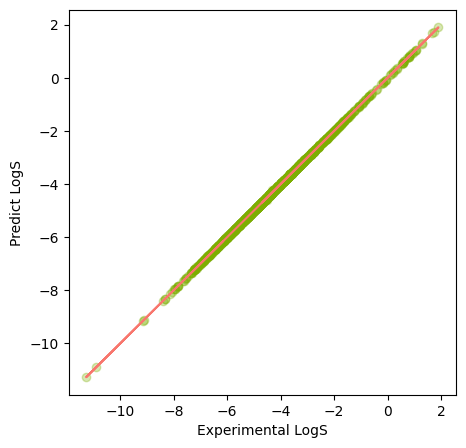

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')
plt.savefig('logS.png')
plt.savefig('logS.pdf')
plt.show()